In [19]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

<h3> Read the Data </h3>

In [5]:
df = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")
df.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243


In [6]:
df_test.head()

,row_id,cfips,first_day_of_month
0,1001_2022-11-01,1001,2022-11-01
1,1003_2022-11-01,1003,2022-11-01
2,1005_2022-11-01,1005,2022-11-01
3,1007_2022-11-01,1007,2022-11-01
4,1009_2022-11-01,1009,2022-11-01


<h3> EDA </h3>

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122265 entries, 0 to 122264
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   row_id                 122265 non-null  object 
 1   cfips                  122265 non-null  int64  
 2   county                 122265 non-null  object 
 3   state                  122265 non-null  object 
 4   first_day_of_month     122265 non-null  object 
 5   microbusiness_density  122265 non-null  float64
 6   active                 122265 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 6.5+ MB


In [7]:
df["cfips"].value_counts()

1001     39
39133    39
39089    39
39091    39
39093    39
         ..
21113    39
21115    39
21117    39
21119    39
56045    39
Name: cfips, Length: 3135, dtype: int64

In [8]:
df_test["cfips"].value_counts()

1001     8
39133    8
39089    8
39091    8
39093    8
        ..
21113    8
21115    8
21117    8
21119    8
56045    8
Name: cfips, Length: 3135, dtype: int64

In [10]:
len(df["first_day_of_month"].value_counts())

39

/tmp/ipykernel_1356/4264011095.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = labels_, rotation=50, ha='right')


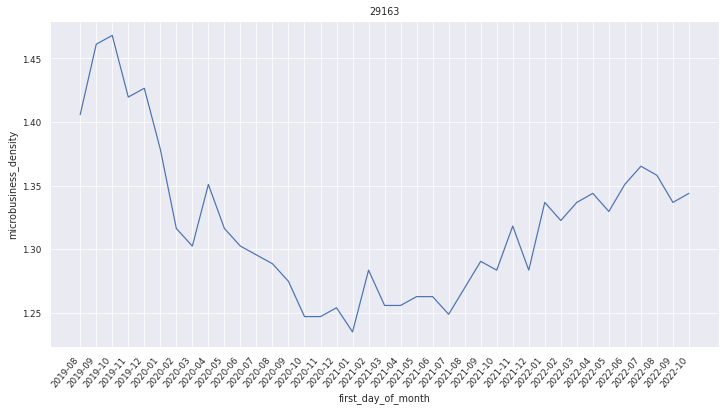

In [52]:
sample_5 = df[df["cfips"].isin(df["cfips"].sample(1).values)]
sample_5.set_index('first_day_of_month', inplace=True)

sns.set_theme("paper")
fig, ax = plt.subplots(figsize = (12,6))
fig = sns.lineplot(x='first_day_of_month', y='microbusiness_density', data=sample_5, markers=True)
ax.set_title(sample_5["cfips"].values[0])
labels_ = [x[:7] for x in sample_5.index]
ax.set_xticklabels(labels = labels_, rotation=50, ha='right')
plt.show()